# Importing the necessary libraries

In [5]:
import requests
import base64
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Loading the Dataset

In [ ]:
df = pd.read_csv("Project_Database_NoOutliers.csv")
df.head()

,Unnamed: 0,artist,danceability,valence,tempo,liveness,song,popularity,speechiness,mood,...,4th_occurence,4th_word_percentage,5th_word,5th_occurence,5th_word_percentage,longest_word,longest_word_length,unique_word_percentage,Explicitness,anomaly
0,0,Miley Cyrus,0.652,0.470,96.021,0.0886,Party In The U.S.A.,78.0,0.0420,NaN,...,9,1.918977,party,9,1.918977,butterflies,11,19.402985,0,1
1,1,Green Day,0.567,0.416,159.779,0.2220,21 Guns,75.0,0.0355,NaN,...,18,3.180212,love,14,2.473498,leatherstudded,14,5.300353,0,-1
2,2,Miley Cyrus,0.336,0.299,161.010,0.1410,The Climb,72.0,0.0325,NaN,...,7,2.040816,believe,6,1.749271,everything,10,22.448980,0,1
3,3,Lady Gaga,0.696,0.714,119.001,0.0842,Bad Romance,78.0,0.0363,NaN,...,10,2.032520,got,10,2.032520,replayayayay,12,12.804878,0,1
4,4,Owl City,0.513,0.461,180.118,0.1180,Fireflies,78.0,0.0439,NaN,...,10,2.949853,so,8,2.359882,everything,10,20.058997,0,1


In [4]:
billboard=pd.read_csv("Billboard_data_lyrics.csv")

In [ ]:
hits=df[df['hit'] == 1]

# Audio Features

## Graph showing the audio features distribution of the top 5 hit songs in 2021
The audio features of interest for the following graphs are: loudness, energy, danceability, and acousticness 

In [19]:
df_2021=df[np.floor(df['year']).astype('Int64')==2021]
df_2021_hits=df_2021[df_2021['hit']==1]

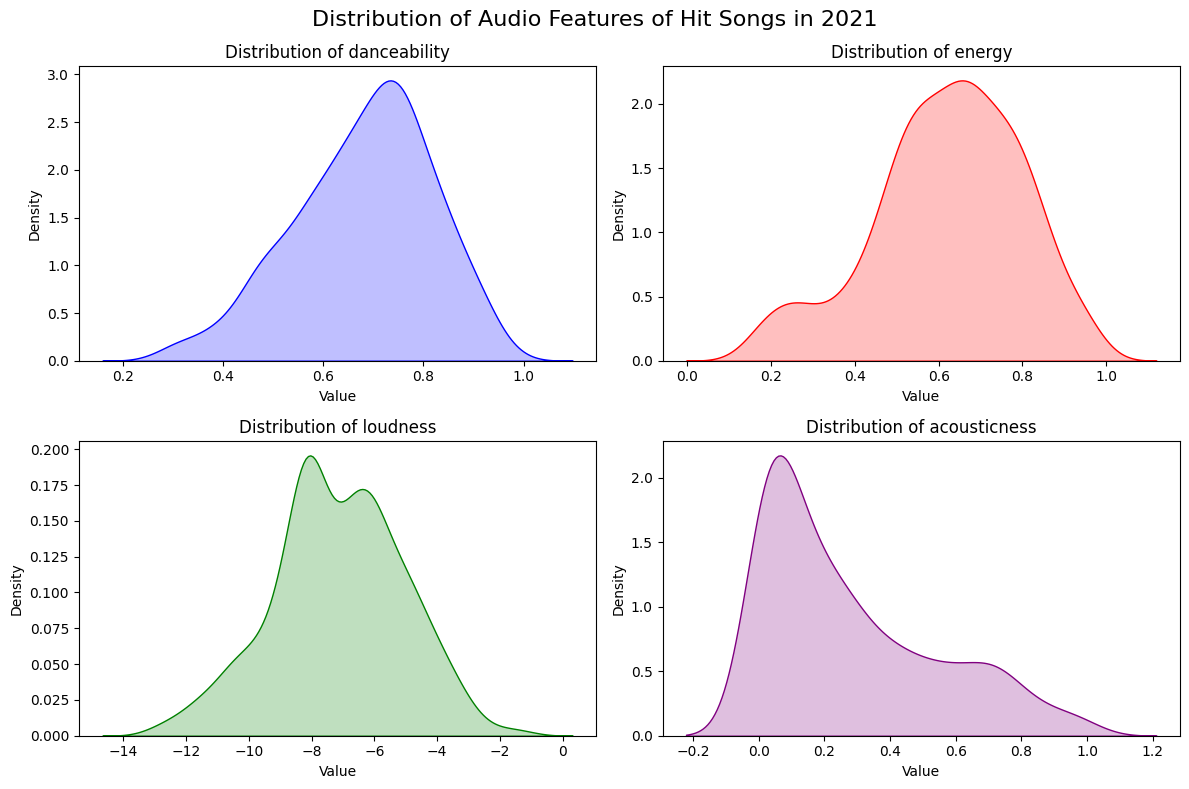

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Defining the features we want to plot
features = ['danceability', 'energy', 'loudness', 'acousticness']
colors = ['blue', 'red', 'green', 'purple']

# Looping through each feature and plotting
for ax, feature, color in zip(axes.flat, features, colors):
    sns.kdeplot(df_2021_hits[feature], ax=ax, fill=True, color=color)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

fig.suptitle("Distribution of Audio Features of Hit Songs in 2021", fontsize=16)
plt.tight_layout()
plt.show()

Same plots above but across all years of our dataset: 2009 --> 2021

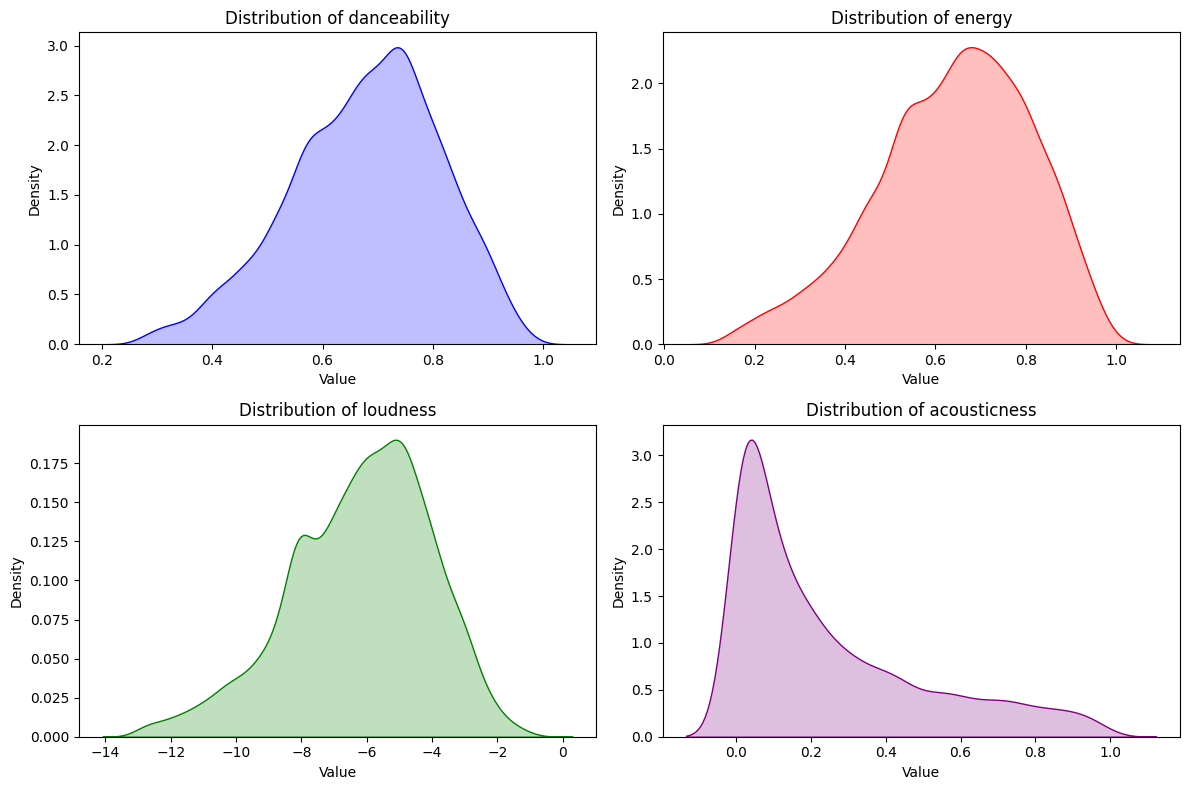

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

features = ['danceability', 'energy', 'loudness', 'acousticness']
colors = ['blue', 'red', 'green', 'purple']

for ax, feature, color in zip(axes.flat, features, colors):
    sns.kdeplot(hits[feature], ax=ax, fill=True, color=color)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()

To compare the audio features of the top 5 songs only and across the years 

In [25]:
# filtering out df having only the hits of 5 years: 2009, 2012, 2015, 2018, and 2021
df_2009=hits[hits['year'].astype("Int64")==2009]
df_2012=hits[hits['year'].astype("Int64")==2012]
df_2015=hits[hits['year'].astype("Int64")==2015]
df_2018=hits[hits['year'].astype("Int64")==2018]

df_2009_billboard=df_2009[df_2009['song'].isin(billboard['song'])].drop_duplicates(subset=["song"], keep="first")
df_2012_billboard=df_2012[df_2012['song'].isin(billboard['song'])].drop_duplicates(subset=["song"], keep="first")
df_2015_billboard=df_2015[df_2015['song'].isin(billboard['song'])].drop_duplicates(subset=["song"], keep="first")
df_2018_billboard=df_2018[df_2018['song'].isin(billboard['song'])].drop_duplicates(subset=["song"], keep="first")
df_2021_billboard=df_2021[df_2021['song'].isin(billboard['song'])].drop_duplicates(subset=["song"], keep="first")
df_2021_billboard=df_2021_billboard[df_2021_billboard['artist'].isin(billboard['artist'])].drop_duplicates(subset=['song'], keep="first")

# filtering out the top5 songs of each dataframe
top5_2009 = df_2009_billboard.sort_values(by='popularity', ascending=False).head(5)
top5_2012 = df_2012_billboard.sort_values(by='popularity', ascending=False).head(5)
top5_2015 = df_2015_billboard.sort_values(by='popularity', ascending=False).head(5)
top5_2018 = df_2018_billboard.sort_values(by='popularity', ascending=False).head(5)
top5_2021 = df_2021_billboard.sort_values(by='popularity', ascending=False).head(5)

df_combined = pd.concat([top5_2009, top5_2012, top5_2015, top5_2018, top5_2021], ignore_index=True)
df_combined["year"] = df_combined["year"].astype('Int64')



## Top 5 songs of each of the following years: 2009, 2012, 2015, 2018, 2021

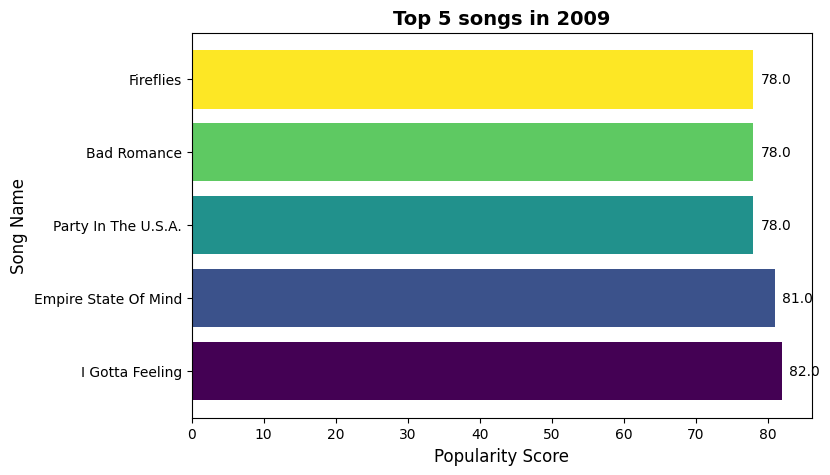

In [ ]:
import numpy as np

# Creating the bar plot
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(top5_2009['popularity'])))
plt.barh(top5_2009["song"], top5_2009["popularity"], color=colors)

plt.xlabel("Popularity Score", fontsize=12)
plt.ylabel("Song Name", fontsize=12)
plt.title("Top 5 songs in 2009", fontsize=14, fontweight="bold")

for index, value in enumerate(top5_2009["popularity"]):
    plt.text(value + 1, index, str(value), va="center", fontsize=10)

plt.show()

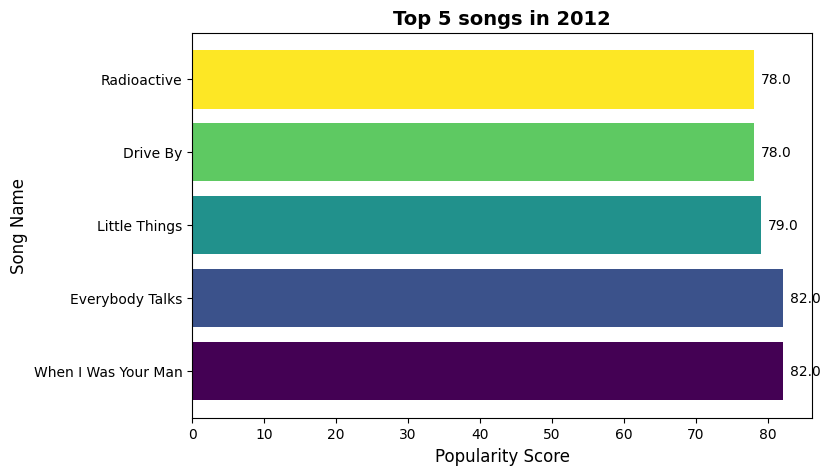

In [ ]:
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(top5_2012['popularity'])))
plt.barh(top5_2012["song"], top5_2012["popularity"], color=colors)

plt.xlabel("Popularity Score", fontsize=12)
plt.ylabel("Song Name", fontsize=12)
plt.title("Top 5 songs in 2012", fontsize=14, fontweight="bold")

for index, value in enumerate(top5_2012["popularity"]):
    plt.text(value + 1, index, str(value), va="center", fontsize=10)

plt.show()

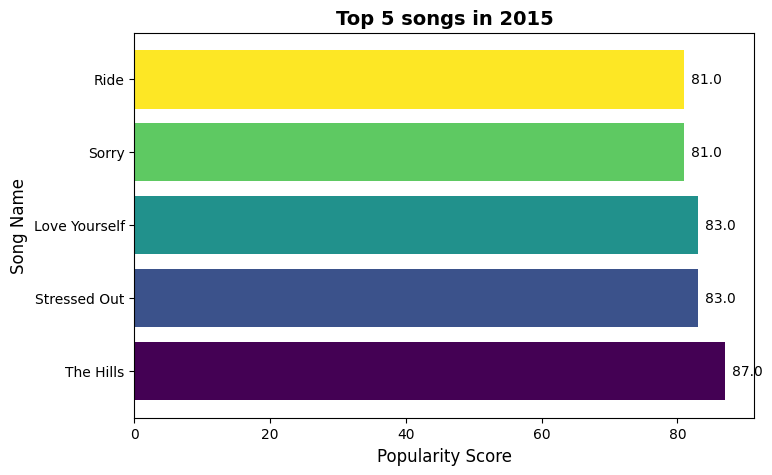

In [ ]:
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(top5_2015['popularity'])))
plt.barh(top5_2015["song"], top5_2015["popularity"], color=colors)

plt.xlabel("Popularity Score", fontsize=12)
plt.ylabel("Song Name", fontsize=12)
plt.title("Top 5 songs in 2015", fontsize=14, fontweight="bold")

for index, value in enumerate(top5_2015["popularity"]):
    plt.text(value + 1, index, str(value), va="center", fontsize=10)

plt.show()

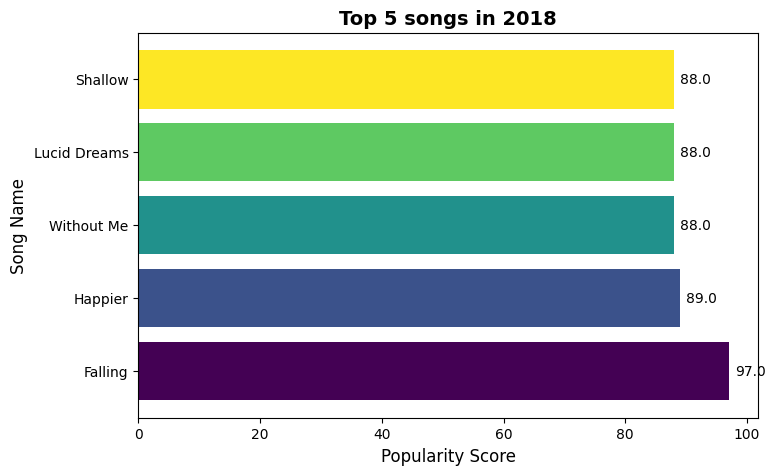

In [ ]:
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(top5_2018['popularity'])))
plt.barh(top5_2018["song"], top5_2018["popularity"], color=colors)

plt.xlabel("Popularity Score", fontsize=12)
plt.ylabel("Song Name", fontsize=12)
plt.title("Top 5 songs in 2018", fontsize=14, fontweight="bold")

for index, value in enumerate(top5_2018["popularity"]):
    plt.text(value + 1, index, str(value), va="center", fontsize=10)

plt.show()

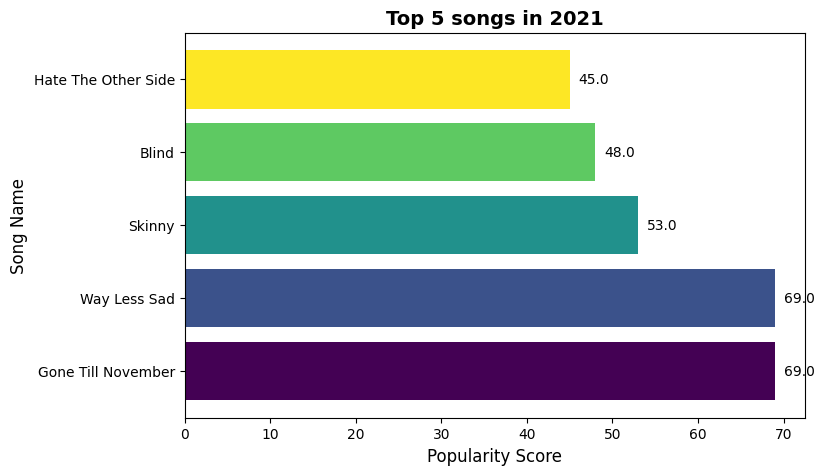

In [ ]:
plt.figure(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(top5_2021['popularity'])))
plt.barh(top5_2021["song"], top5_2021["popularity"], color=colors)

plt.xlabel("Popularity Score", fontsize=12)
plt.ylabel("Song Name", fontsize=12)
plt.title("Top 5 songs in 2021", fontsize=14, fontweight="bold")

for index, value in enumerate(top5_2021["popularity"]):
    plt.text(value + 1, index, str(value), va="center", fontsize=10)

plt.show()

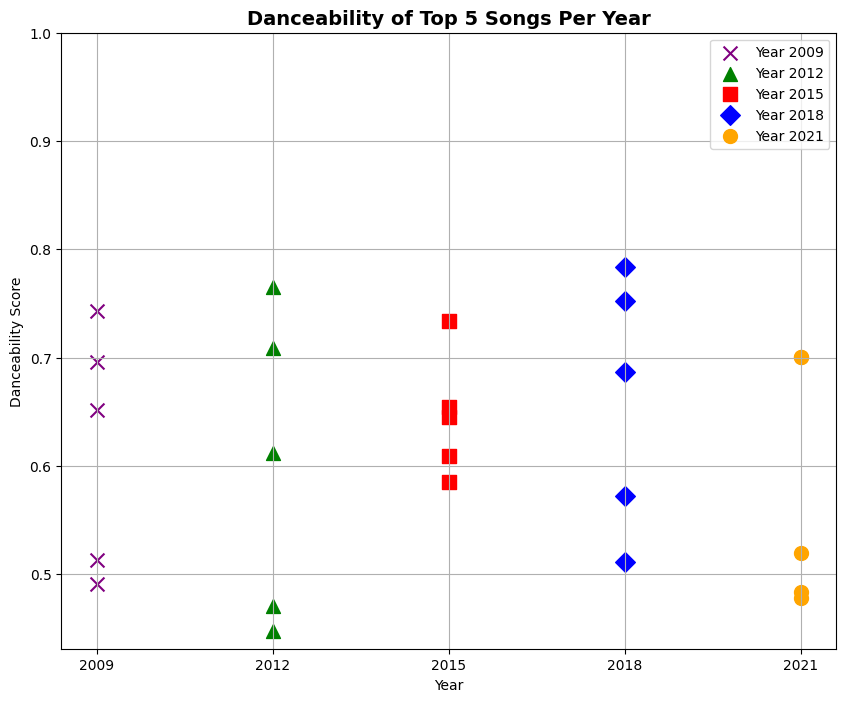

In [ ]:
# Defining marker styles and colors
years = df_combined["year"].astype("Int64").unique()
marker_styles = ['x', '^', 's', 'D', 'o']
colors = ['purple', 'green', 'red', 'blue', 'orange']

plt.figure(figsize=(10, 8))
for year, marker, color in zip(years, marker_styles, colors):
    subset = df_combined[df_combined["year"] == year]  # Filtering songs for the given year
    plt.scatter([year]*len(subset), subset["danceability"],  # Keeping x-axis fixed at year
                label=f'Year {year}', 
                marker=marker, 
                color=color, s=100)

# Formatting
plt.title("Danceability of Top 5 Songs Per Year", fontsize=14, fontweight='bold')
plt.ylabel("Danceability Score")
plt.xlabel("Year")
plt.xticks(years)
plt.yticks([i/10 for i in range(5, 11)]) 
plt.legend()
plt.grid(True)

plt.show()

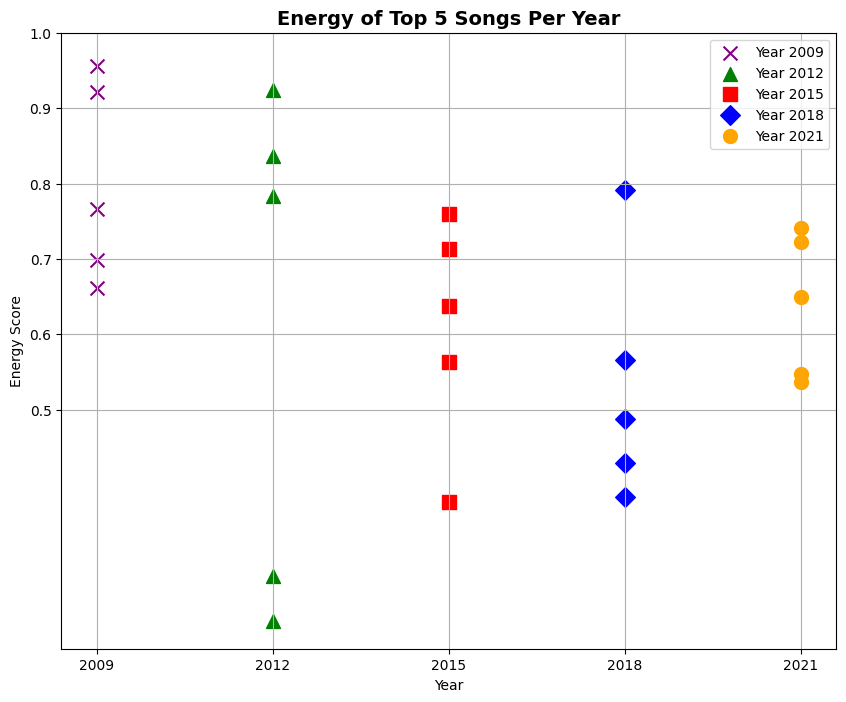

In [ ]:
years = df_combined["year"].astype("Int64").unique()
marker_styles = ['x', '^', 's', 'D', 'o']
colors = ['purple', 'green', 'red', 'blue', 'orange']

plt.figure(figsize=(10, 8))
for year, marker, color in zip(years, marker_styles, colors):
    subset = df_combined[df_combined["year"] == year]  
    plt.scatter([year]*len(subset), subset["energy"],  
                label=f'Year {year}', 
                marker=marker, 
                color=color, s=100)

plt.title("Energy of Top 5 Songs Per Year", fontsize=14, fontweight='bold')
plt.ylabel("Energy Score")
plt.xlabel("Year")
plt.xticks(years)
plt.yticks([i/10 for i in range(5, 11)])  
plt.legend()
plt.grid(True)

plt.show()

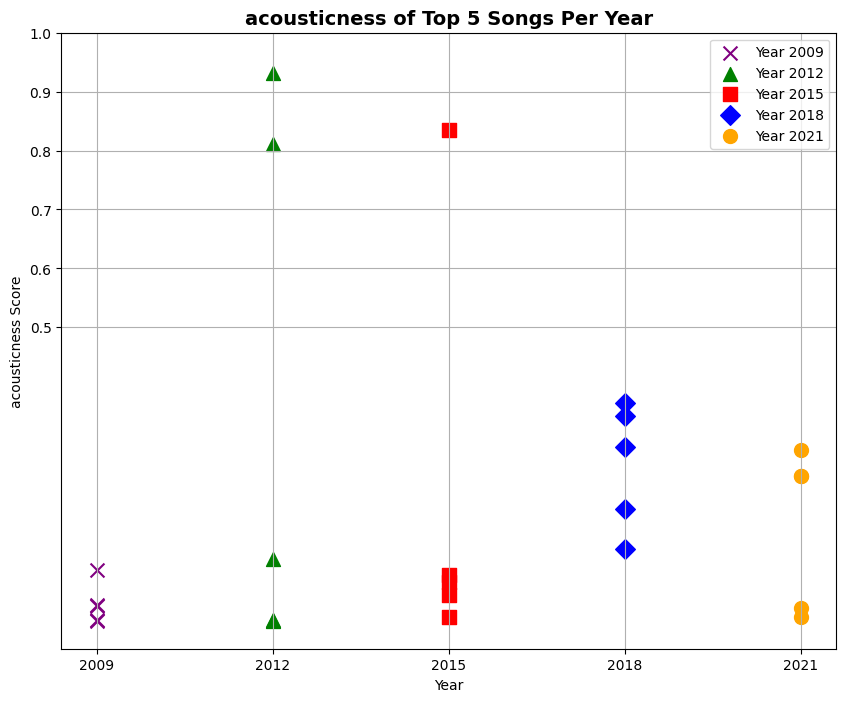

In [ ]:
years = df_combined["year"].astype("Int64").unique()
marker_styles = ['x', '^', 's', 'D', 'o']
colors = ['purple', 'green', 'red', 'blue', 'orange']

plt.figure(figsize=(10, 8))
for year, marker, color in zip(years, marker_styles, colors):
    subset = df_combined[df_combined["year"] == year]  
    plt.scatter([year]*len(subset), subset["acousticness"],  
                label=f'Year {year}', 
                marker=marker, 
                color=color, s=100)

plt.title("acousticness of Top 5 Songs Per Year", fontsize=14, fontweight='bold')
plt.ylabel("acousticness Score")
plt.xlabel("Year")
plt.xticks(years)
plt.yticks([i/10 for i in range(5, 11)])  
plt.legend()
plt.grid(True)

plt.show()

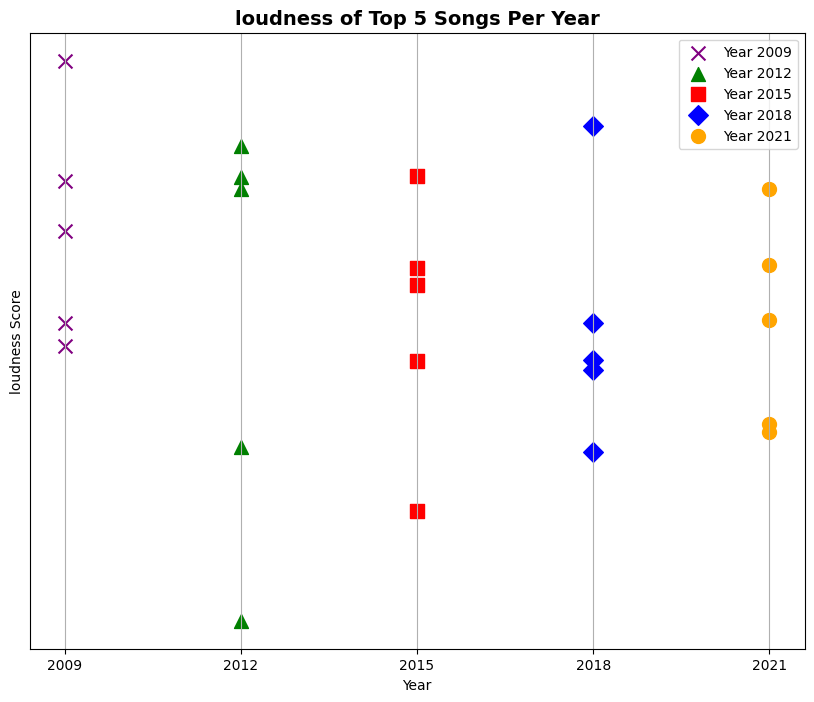

In [ ]:
years = df_combined["year"].astype("Int64").unique()
marker_styles = ['x', '^', 's', 'D', 'o']
colors = ['purple', 'green', 'red', 'blue', 'orange']

plt.figure(figsize=(10, 8))
for year, marker, color in zip(years, marker_styles, colors):
    subset = df_combined[df_combined["year"] == year]  
    plt.scatter([year]*len(subset), subset["loudness"],  
                label=f'Year {year}', 
                marker=marker, 
                color=color, s=100)

plt.title("loudness of Top 5 Songs Per Year", fontsize=14, fontweight='bold')
plt.ylabel("loudness Score")
plt.xlabel("Year")
plt.xticks(years)
plt.yticks([i for i in range(0, -12)])  
plt.legend()
plt.grid(True)

plt.show()

## Song duration distribution of hits

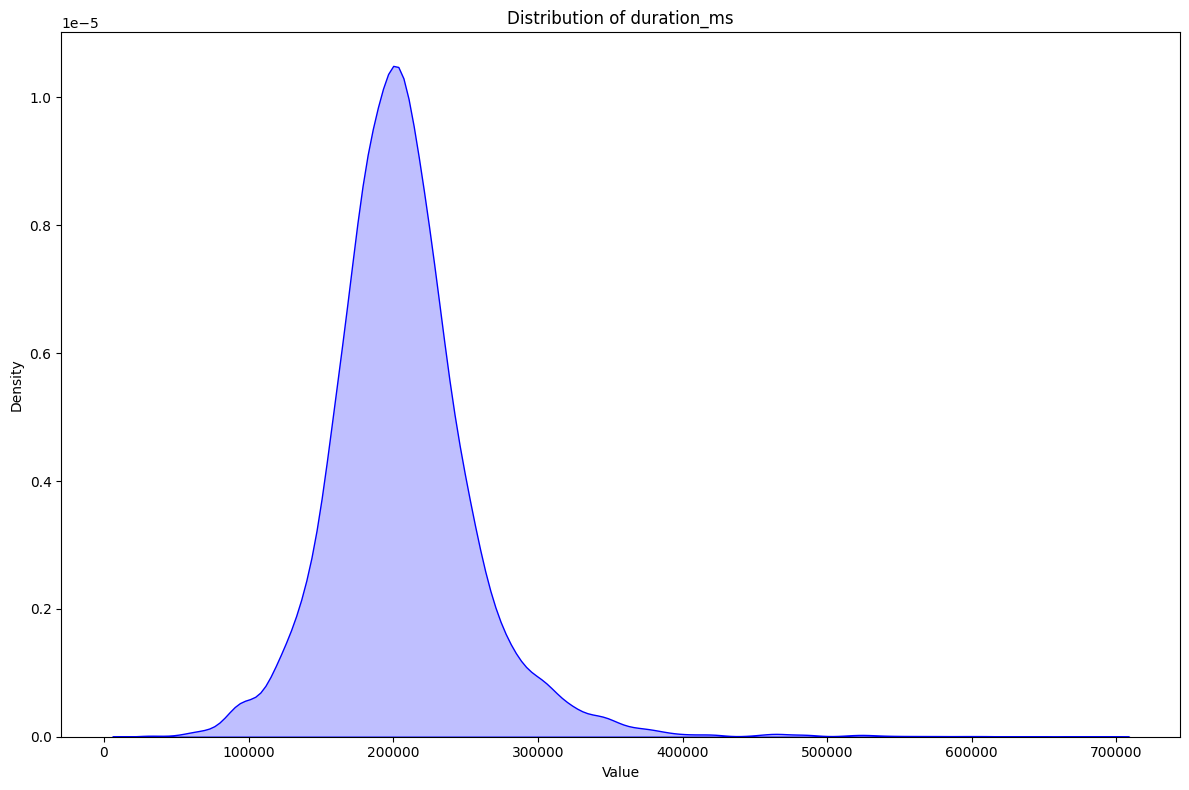

In [ ]:
plt.figure(figsize=(12, 8))

# Plotting the distribution of 'duration_ms'
sns.kdeplot(hits['duration_ms'], fill=True, color='blue')
plt.title('Distribution of duration_ms')
plt.xlabel('Value')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# Trends over the years
Plotting how the audio features such as danceability, acousticness, energy and loudness change for the hits over the years. 

In [39]:
avg_audio_features = hits[["year", "danceability", "loudness", "energy", "acousticness"]].groupby("year").mean()
avg_audio_features

,danceability,loudness,energy,acousticness
year,,,,
2009.0,0.620333,-5.475058,0.730957,0.180847
2010.0,0.655184,-5.228019,0.741107,0.143872
2011.0,0.627282,-5.853435,0.695492,0.179132
2012.0,0.627069,-5.443041,0.717731,0.159187
2013.0,0.622981,-6.188564,0.669603,0.185873
2014.0,0.628547,-6.269628,0.665186,0.210589
2015.0,0.628424,-6.495772,0.632467,0.221897
2016.0,0.645669,-6.271694,0.626192,0.237535
2017.0,0.665317,-6.599400,0.607605,0.259189


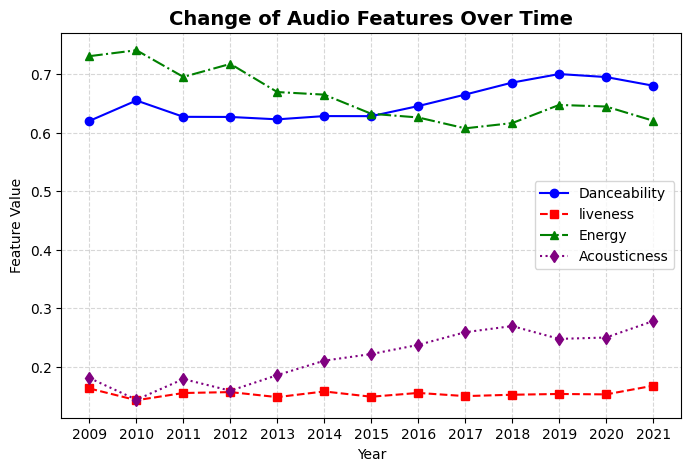

In [ ]:
avg_audio_features = hits[["year", "danceability", "liveness", "energy", "acousticness", "duration_ms"]].groupby("year").mean()
plt.figure(figsize=(8, 5))

# Plotting each feature
plt.plot(avg_audio_features.index, avg_audio_features["danceability"], marker="o", linestyle="-", label="Danceability", color="blue")
plt.plot(avg_audio_features.index, avg_audio_features["liveness"], marker="s", linestyle="--", label="liveness", color="red")
plt.plot(avg_audio_features.index, avg_audio_features["energy"], marker="^", linestyle="-.", label="Energy", color="green")
plt.plot(avg_audio_features.index, avg_audio_features["acousticness"], marker="d", linestyle=":", label="Acousticness", color="purple")

# Formatting
plt.title("Change of Audio Features Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Feature Value")
plt.xticks(avg_audio_features.index)  # Ensuring only years in the dataset appear
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.show()

## Mood of the hit songs over the years

C:\Users\USER\AppData\Local\Temp\ipykernel_20936\2148536732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hits['year']=hits['year'].astype('Int64')


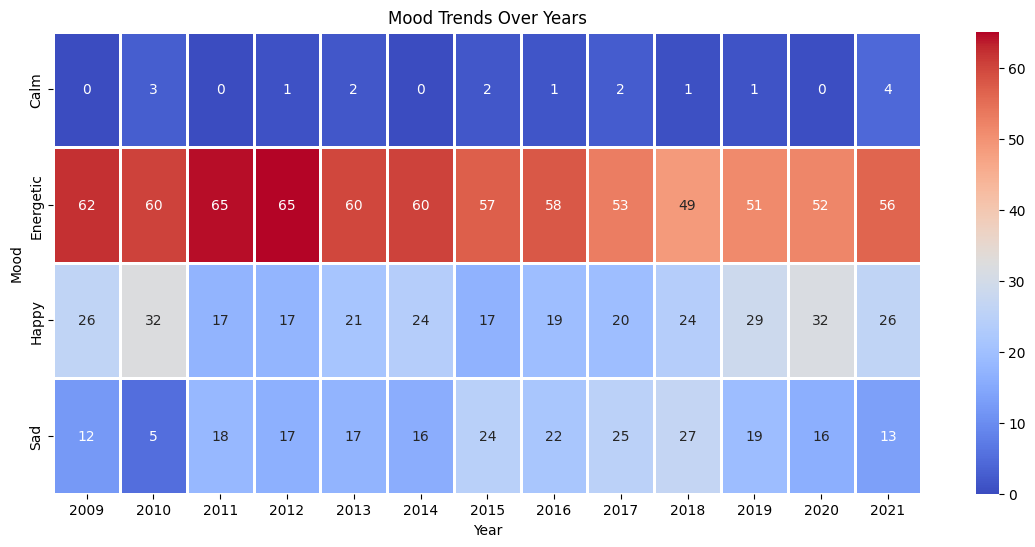

In [ ]:
import seaborn as sns

# Creating a pivot table for heatmap
hits['year']=hits['year'].astype('Int64')
mood_heatmap = hits.groupby(["mood", "year"]).size().unstack().fillna(0)
df_percentages = mood_heatmap.div(mood_heatmap.sum(axis=0), axis=1) * 100

# Plotting the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(df_percentages, annot=True, cmap="coolwarm", fmt=".0f", linewidths=1)
plt.title("Mood Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Mood")
plt.show()

### Mood of the hit songs per year

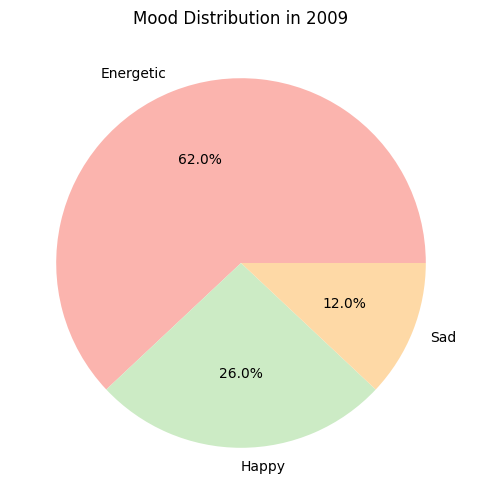

In [ ]:
# Filtering data for one year
hits_2009 = hits[hits["year"] == 2009]

# Count moods
mood_counts_2009 = hits_2009["mood"].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(mood_counts_2009, labels=mood_counts_2009.index, autopct="%1.1f%%", colors=plt.cm.Pastel1(np.linspace(0, 1, 5)))
plt.title("Mood Distribution in 2009")
plt.show()

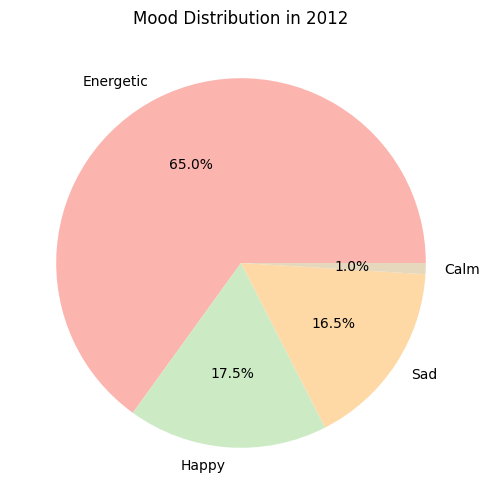

In [ ]:
hits_2012 = hits[hits["year"] == 2012]

mood_counts_2012 = hits_2012["mood"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(mood_counts_2012, labels=mood_counts_2012.index, autopct="%1.1f%%", colors=plt.cm.Pastel1(np.linspace(0, 1, 5)))
plt.title("Mood Distribution in 2012")
plt.show()

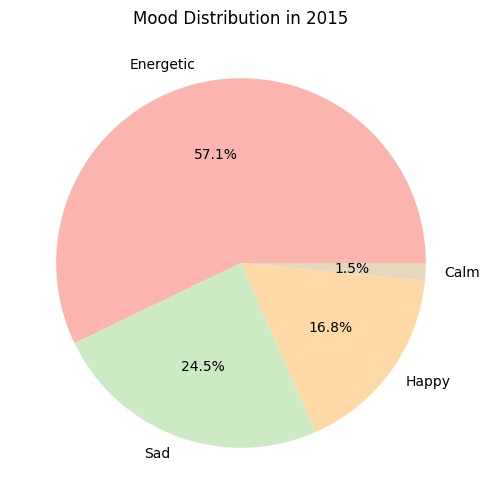

In [ ]:
hits_2015 = hits[hits["year"] == 2015]

mood_counts_2015 = hits_2015["mood"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(mood_counts_2015, labels=mood_counts_2015.index, autopct="%1.1f%%", colors=plt.cm.Pastel1(np.linspace(0, 1, 5)))
plt.title("Mood Distribution in 2015")
plt.show()

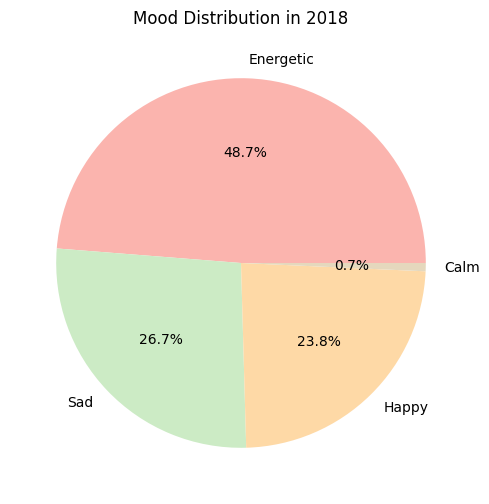

In [ ]:
hits_2018 = hits[hits["year"] == 2018]

mood_counts_2018 = hits_2018["mood"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(mood_counts_2018, labels=mood_counts_2018.index, autopct="%1.1f%%", colors=plt.cm.Pastel1(np.linspace(0, 1, 5)))
plt.title("Mood Distribution in 2018")
plt.show()

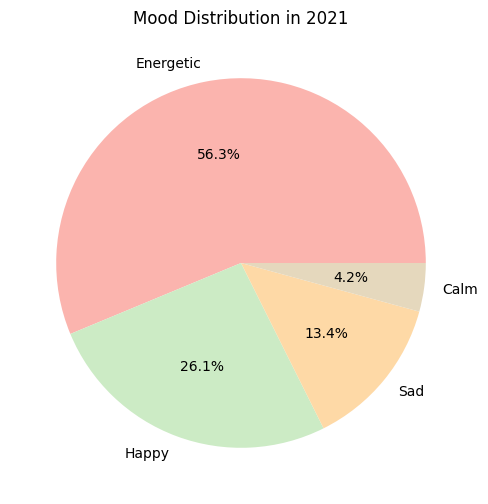

In [ ]:
hits_2021 = hits[hits["year"] == 2021]

mood_counts_2021 = hits_2021["mood"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(mood_counts_2021, labels=mood_counts_2021.index, autopct="%1.1f%%", colors=plt.cm.Pastel1(np.linspace(0, 1, 5)))
plt.title("Mood Distribution in 2021")
plt.show()

## Song duration of the hits over the years

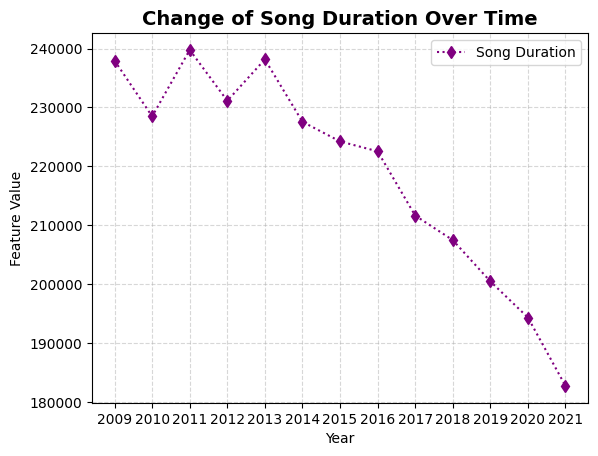

In [ ]:
plt.plot(avg_audio_features.index, avg_audio_features["duration_ms"], marker="d", linestyle=":", label="Song Duration", color="purple")

plt.title("Change of Song Duration Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Feature Value")
plt.xticks(avg_audio_features.index)  
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

plt.show()

## Speechiness vs acousticness vs instrumentalness 

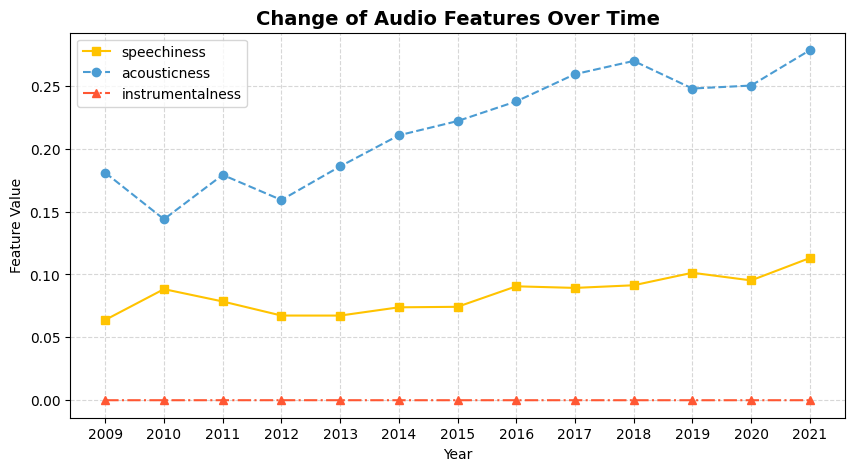

In [ ]:
# Averaging speechiness vs acoustiness vs instrumentalness of hits across the years
avg_audio_features2 = hits[["year", "speechiness", "acousticness", "instrumentalness"]].groupby("year").mean()
plt.figure(figsize=(10, 5))
warm_colors = ["#FF5733", "#4B9CD3", "#FFC300", "#FFD700", "#FFB347"]

# Plotting each feature
plt.plot(avg_audio_features2.index, avg_audio_features2["speechiness"], marker="s", linestyle="-", label="speechiness", color=warm_colors[2])
plt.plot(avg_audio_features2.index, avg_audio_features2["acousticness"], marker="o", linestyle="--", label="acousticness", color=warm_colors[1])
plt.plot(avg_audio_features2.index, avg_audio_features2["instrumentalness"], marker="^", linestyle="-.", label="instrumentalness", color=warm_colors[0])

# Formatting
plt.title("Change of Audio Features Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Feature Value")
plt.xticks(avg_audio_features2.index)  
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()

# Showing the plot
plt.show()

### Energy Distribution of Hit and non-Hit songs across all years

In [48]:
non_hits=df[df['hit']==0]

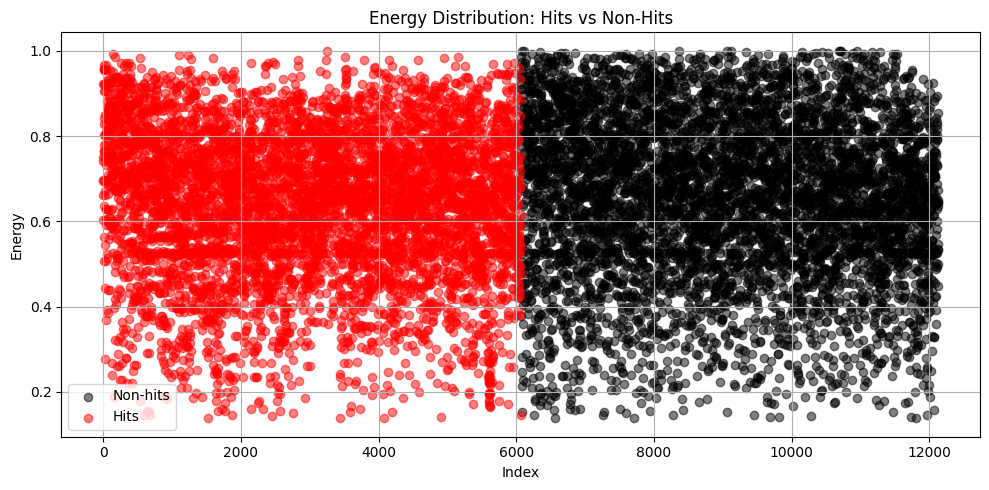

In [49]:

# Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(non_hits.index, non_hits['energy'], color='black', alpha=0.5, label='Non-hits')
plt.scatter(hits.index, hits['energy'], color='red', alpha=0.5, label='Hits')

plt.title('Energy Distribution: Hits vs Non-Hits')
plt.xlabel('Index')
plt.ylabel('Energy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Loudness Distribution of Hit and non-Hit songs across all years

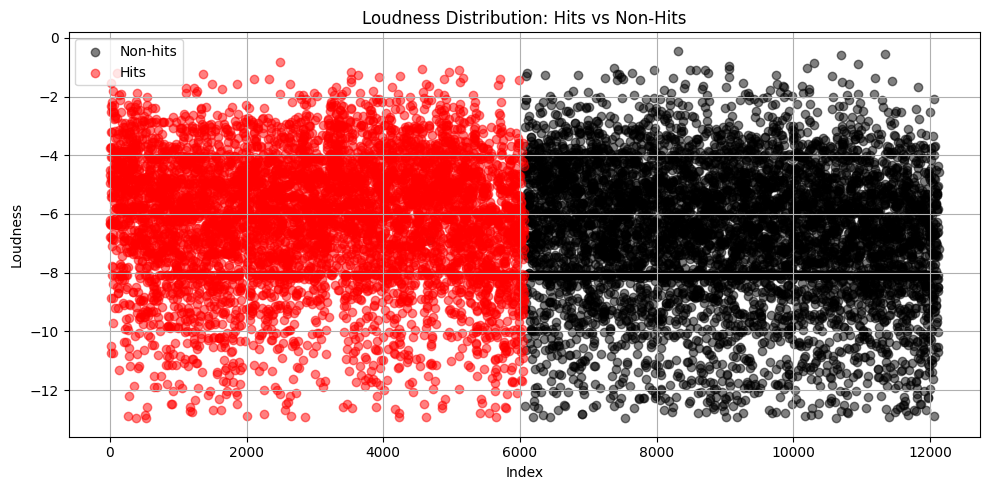

In [50]:

# Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(non_hits.index, non_hits['loudness'], color='black', alpha=0.5, label='Non-hits')
plt.scatter(hits.index, hits['loudness'], color='red', alpha=0.5, label='Hits')

plt.title('Loudness Distribution: Hits vs Non-Hits')
plt.xlabel('Index')
plt.ylabel('Loudness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Danceability Distribution of Hit and non-Hit songs across all years

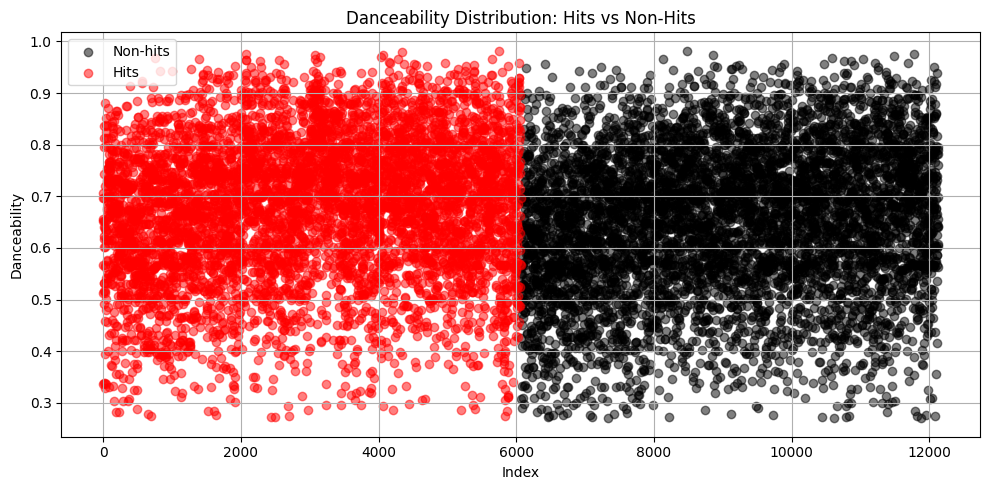

In [51]:

# Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(non_hits.index, non_hits['danceability'], color='black', alpha=0.5, label='Non-hits')
plt.scatter(hits.index, hits['danceability'], color='red', alpha=0.5, label='Hits')

plt.title('Danceability Distribution: Hits vs Non-Hits')
plt.xlabel('Index')
plt.ylabel('Danceability')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Tempo Distribution of Hit and non-Hit songs across all years

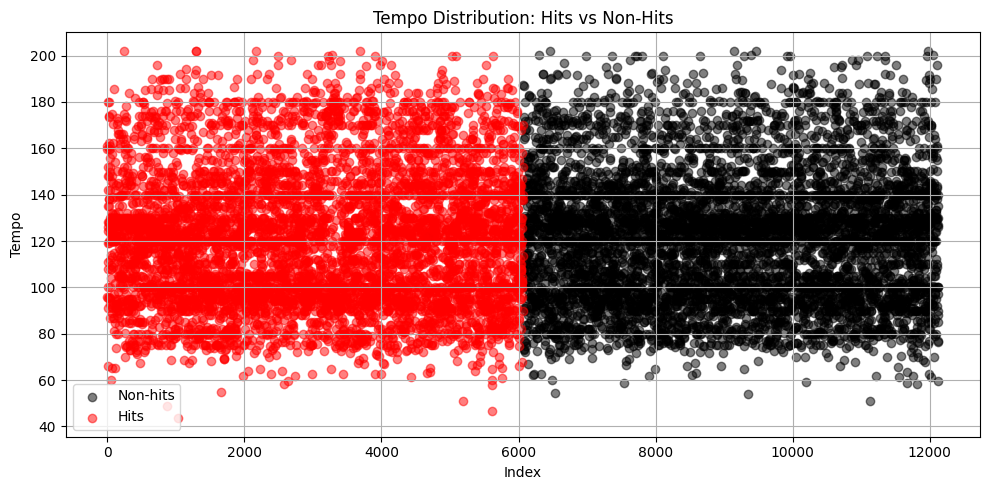

In [52]:

# Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(non_hits.index, non_hits['tempo'], color='black', alpha=0.5, label='Non-hits')
plt.scatter(hits.index, hits['tempo'], color='red', alpha=0.5, label='Hits')

plt.title('Tempo Distribution: Hits vs Non-Hits')
plt.xlabel('Index')
plt.ylabel('Tempo')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Liveness Distribution of Hit and non-Hit songs across all years

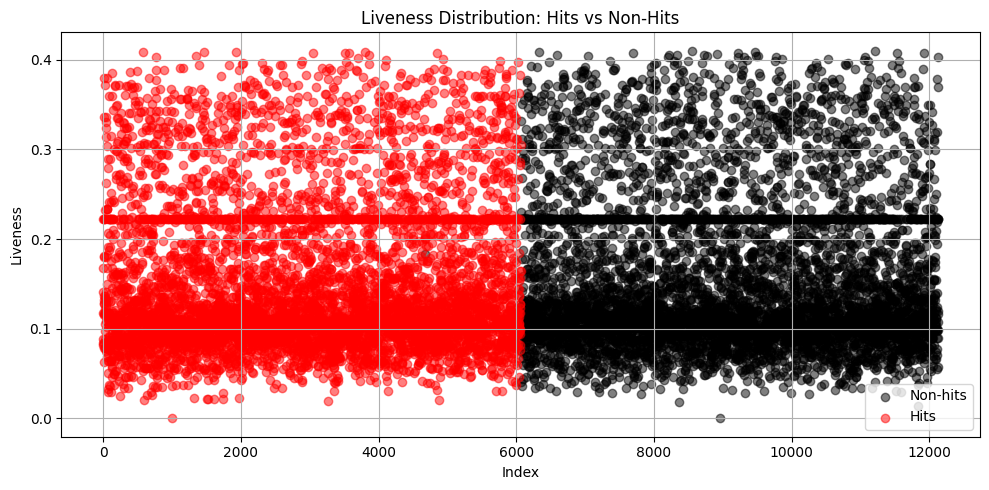

In [53]:

# Scatter Plot
plt.figure(figsize=(10, 5))
plt.scatter(non_hits.index, non_hits['liveness'], color='black', alpha=0.5, label='Non-hits')
plt.scatter(hits.index, hits['liveness'], color='red', alpha=0.5, label='Hits')

plt.title('Liveness Distribution: Hits vs Non-Hits')
plt.xlabel('Index')
plt.ylabel('Liveness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
